# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
#URL
url = "http://api.openweathermap.org/data/2.5/weather?"


{'coord': {'lon': 115.3333, 'lat': -33.65}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 282.62, 'feels_like': 282.62, 'temp_min': 282.62, 'temp_max': 282.62, 'pressure': 1011, 'humidity': 72, 'sea_level': 1011, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 0.71, 'deg': 128, 'gust': 1.94}, 'rain': {'1h': 0.25}, 'clouds': {'all': 97}, 'dt': 1635205693, 'sys': {'type': 2, 'id': 2020551, 'country': 'AU', 'sunrise': 1635197084, 'sunset': 1635244819}, 'timezone': 28800, 'id': 2075265, 'name': 'Busselton', 'cod': 200}


In [4]:
#set up lists to hold weather response data information
lat = []
lon = []
temp_max = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
cities_append = []

In [5]:
city_found_counter = 0 
set_counter = 1 
for city in cities:
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp_max.append(response['main']['temp_max'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        print(f'Processing Record {city_found_counter} of Set {set_counter} | {city} ')
        city_found_counter = city_found_counter + 1
        cities_append.append(city)
    except:
        print(f'{city} not found. Skipping...')
        set_counter = set_counter + 1 
        pass


Processing Record 0 of Set 1 | georgetown 
illoqqortoormiut not found. Skipping...
Processing Record 1 of Set 2 | vrede 
Processing Record 2 of Set 2 | khatanga 
Processing Record 3 of Set 2 | methoni 
Processing Record 4 of Set 2 | sakakah 
Processing Record 5 of Set 2 | la asuncion 
Processing Record 6 of Set 2 | chitral 
Processing Record 7 of Set 2 | ushuaia 
Processing Record 8 of Set 2 | naze 
Processing Record 9 of Set 2 | kargopol 
Processing Record 10 of Set 2 | vanavara 
Processing Record 11 of Set 2 | punta arenas 
Processing Record 12 of Set 2 | dandong 
barentsburg not found. Skipping...
Processing Record 13 of Set 3 | mehamn 
Processing Record 14 of Set 3 | saskylakh 
Processing Record 15 of Set 3 | hermanus 
Processing Record 16 of Set 3 | ereymentau 
Processing Record 17 of Set 3 | port elizabeth 
Processing Record 18 of Set 3 | barrow 
Processing Record 19 of Set 3 | gat 
Processing Record 20 of Set 3 | tautira 
Processing Record 21 of Set 3 | batemans bay 
Processing 

Processing Record 176 of Set 17 | chupa 
Processing Record 177 of Set 17 | shimoda 
Processing Record 178 of Set 17 | busselton 
Processing Record 179 of Set 17 | norman wells 
Processing Record 180 of Set 17 | kodiak 
Processing Record 181 of Set 17 | rantauprapat 
Processing Record 182 of Set 17 | caninde 
Processing Record 183 of Set 17 | avarua 
momcilgrad not found. Skipping...
Processing Record 184 of Set 18 | vredendal 
Processing Record 185 of Set 18 | kirakira 
almenevo not found. Skipping...
Processing Record 186 of Set 19 | yagodnoye 
Processing Record 187 of Set 19 | kaitangata 
guajara-mirim not found. Skipping...
Processing Record 188 of Set 20 | mapiripan 
Processing Record 189 of Set 20 | kemijarvi 
Processing Record 190 of Set 20 | port augusta 
Processing Record 191 of Set 20 | bitung 
Processing Record 192 of Set 20 | lamar 
Processing Record 193 of Set 20 | alamosa 
Processing Record 194 of Set 20 | leh 
Processing Record 195 of Set 20 | cabo san lucas 
Processing R

Processing Record 355 of Set 27 | touros 
Processing Record 356 of Set 27 | sukhumi 
Processing Record 357 of Set 27 | axim 
Processing Record 358 of Set 27 | poronaysk 
Processing Record 359 of Set 27 | tilichiki 
Processing Record 360 of Set 27 | biograd na moru 
Processing Record 361 of Set 27 | opuwo 
Processing Record 362 of Set 27 | hanmer springs 
Processing Record 363 of Set 27 | dharchula 
Processing Record 364 of Set 27 | sorland 
Processing Record 365 of Set 27 | arraial do cabo 
Processing Record 366 of Set 27 | mareeba 
Processing Record 367 of Set 27 | nouadhibou 
Processing Record 368 of Set 27 | itaueira 
Processing Record 369 of Set 27 | kamenka 
Processing Record 370 of Set 27 | aykhal 
Processing Record 371 of Set 27 | coihaique 
Processing Record 372 of Set 27 | veraval 
Processing Record 373 of Set 27 | tala 
Processing Record 374 of Set 27 | altenholz 
Processing Record 375 of Set 27 | maputo 
talawdi not found. Skipping...
Processing Record 376 of Set 28 | birjan

Processing Record 530 of Set 43 | dzhebariki-khaya 
Processing Record 531 of Set 43 | gerash 
Processing Record 532 of Set 43 | husavik 
Processing Record 533 of Set 43 | yerbogachen 
Processing Record 534 of Set 43 | dawei 
Processing Record 535 of Set 43 | moncao 
Processing Record 536 of Set 43 | namikupa 
Processing Record 537 of Set 43 | zonguldak 
Processing Record 538 of Set 43 | tiznit 
Processing Record 539 of Set 43 | muros 
tabiauea not found. Skipping...
Processing Record 540 of Set 44 | szentes 
nguiu not found. Skipping...
Processing Record 541 of Set 45 | mtwara 
Processing Record 542 of Set 45 | aswan 
Processing Record 543 of Set 45 | lumphat 
Processing Record 544 of Set 45 | zharkent 
Processing Record 545 of Set 45 | san cristobal 
Processing Record 546 of Set 45 | saint anthony 
Processing Record 547 of Set 45 | maku 
Processing Record 548 of Set 45 | masalli 
Processing Record 549 of Set 45 | huangpu 
Processing Record 550 of Set 45 | sabang 
Processing Record 551

In [6]:
len(cities_append)
#len(lat)

566

In [7]:
weather_dict = {
    'city':cities_append,
    'lat':lat,
    'lon':lon,
    'temp_max':temp_max,
    'temp':temp,
    'humidity':humidity,
    'cloudiness':cloudiness,
    'wind_speed':wind_speed,
    'country':country,
    'date':date
}
weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv('weather_data.csv',index=False,header=True)
weather_data.head()

,city,lat,lon,temp_max,temp,humidity,cloudiness,wind_speed,country,date
0,georgetown,5.4112,100.3354,299.79,298.79,92,40,1.34,MY,1635205751
1,vrede,-27.4257,29.1659,283.68,283.68,94,99,1.96,ZA,1635205902
2,khatanga,71.9667,102.5000,257.97,257.97,96,100,2.96,RU,1635205902
3,methoni,36.8197,21.7049,288.83,287.07,67,80,4.44,GR,1635205902
4,sakakah,29.9697,40.2064,292.91,292.91,29,0,2.71,SA,1635205903


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
weather_data = weather_data.loc[weather_data['humidity'] < 100 ]
weather_data.describe()

,lat,lon,temp_max,temp,humidity,cloudiness,wind_speed,date
count,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,560.000000,5.600000e+02
mean,19.767088,21.346113,288.179036,287.836214,73.548214,56.228571,3.232304,1.635206e+09
std,33.218579,89.589867,11.468770,11.417762,19.379124,38.201348,2.438376,1.967600e+02
min,-54.800000,-175.200000,249.700000,249.700000,13.000000,0.000000,0.000000,1.635205e+09
25%,-8.800150,-62.250575,280.550000,280.037500,65.000000,20.000000,1.460000,1.635206e+09
50%,24.390550,25.985050,290.520000,290.215000,78.000000,65.500000,2.620000,1.635206e+09
75%,46.624950,99.858900,297.225000,297.135000,88.000000,93.000000,4.312500,1.635206e+09
max,78.218600,178.416700,306.020000,306.020000,99.000000,100.000000,15.640000,1.635206e+09


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

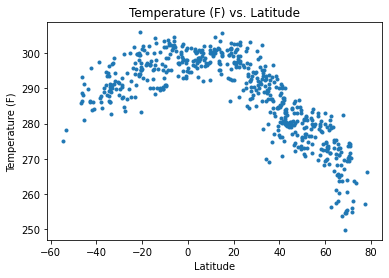

In [24]:
x_axis = weather_data['lat']
data = weather_data['temp']
plt.scatter(x_axis, data, marker='.')
plt.title('Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Temperature (F) vs. Latitude.png')

## Latitude vs. Humidity Plot

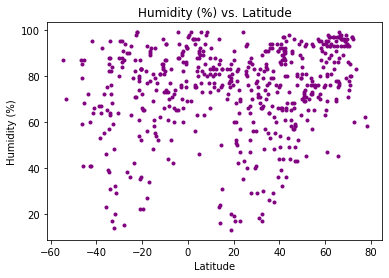

In [26]:
x_axis = weather_data['lat']
data = weather_data['humidity']
plt.scatter(x_axis, data, marker='.', facecolors='purple')
plt.title('Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Humidity (%) vs. Latitude.png')

## Latitude vs. Cloudiness Plot

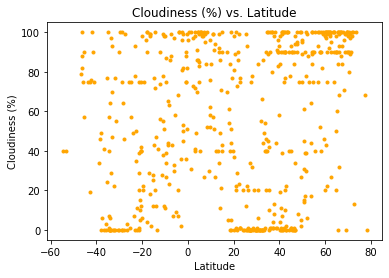

In [27]:
x_axis = weather_data['lat']
data = weather_data['cloudiness']
plt.scatter(x_axis, data, marker='.', facecolors='orange')
plt.title('Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Cloudiness (%) vs. Latitude.png')

## Latitude vs. Wind Speed Plot

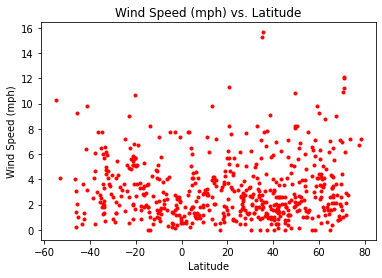

In [29]:
x_axis = weather_data['lat']
data = weather_data['wind_speed']
plt.scatter(x_axis, data, marker='.', facecolors='red')
plt.title('Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Wind Speed (mph) vs. Latitude.png')

## Linear Regression

In [14]:
northern_hemisphere = weather_data.loc[weather_data['lat'] > 0 ]
southern_hemisphere = weather_data.loc[weather_data['lat'] < 0 ]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

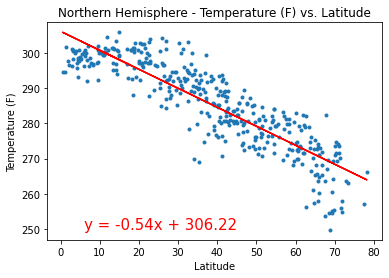

In [51]:
x_axis = northern_hemisphere['lat']
data = northern_hemisphere['temp_max']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,250),fontsize=15,color="red")

plt.scatter(x_axis, data, marker='.' )
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Northern Hemisphere - Temperature (F) vs. Latitude.png')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

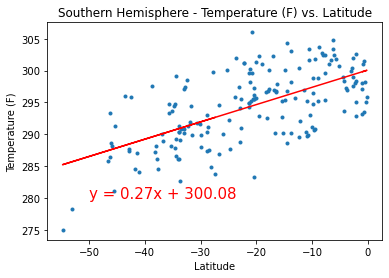

In [53]:
x_axis = southern_hemisphere['lat']
data = southern_hemisphere['temp_max']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,280),fontsize=15,color="red")


plt.scatter(x_axis, data, marker='.')
plt.title('Southern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Southern Hemisphere - Temperature (F) vs. Latitude.png')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

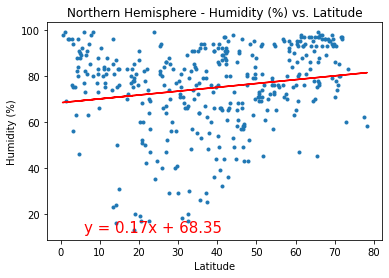

In [64]:
x_axis = northern_hemisphere['lat']
data = northern_hemisphere['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,12),fontsize=15,color="red")



plt.scatter(x_axis, data, marker='.')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Northern Hemisphere - Humidity (%) vs. Latitude.png')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

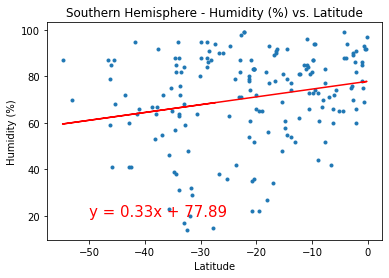

In [63]:
x_axis = southern_hemisphere['lat']
data = southern_hemisphere['humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.scatter(x_axis, data, marker='.')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Southern Hemisphere - Humidity (%) vs. Latitude.png')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

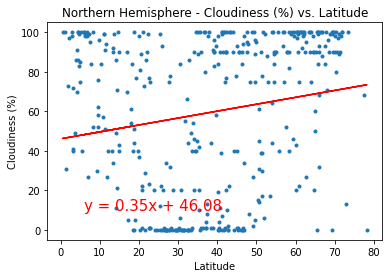

In [62]:
x_axis = northern_hemisphere['lat']
data = northern_hemisphere['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.scatter(x_axis, data, marker='.')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Northern Hemisphere - Cloudiness (%) vs. Latitude.png')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

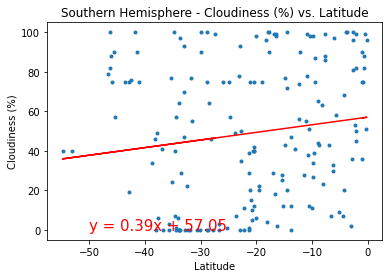

In [61]:
x_axis = southern_hemisphere['lat']
data = southern_hemisphere['cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")

plt.scatter(x_axis, data, marker='.')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Southern Hemisphere - Cloudiness (%) vs. Latitude.png')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

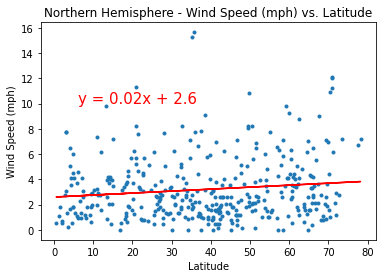

In [60]:
x_axis = northern_hemisphere['lat']
data = northern_hemisphere['wind_speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.scatter(x_axis, data, marker='.')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Northern Hemisphere - Wind Speed (mph) vs. Latitude.png')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

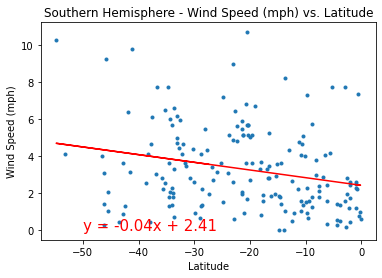

In [59]:
x_axis = southern_hemisphere['lat']
data = southern_hemisphere['wind_speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, data)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")

plt.scatter(x_axis, data, marker='.')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('Southern Hemisphere - Wind Speed (mph) vs. Latitude.png')